# **Violin Plot**


This notebook demonstrates a violin plot.

The key parameters need to be edited in the Parameters section below, in particular for selecting the data of interest.


In [20]:
#  Load the required libraries

library(sf)
library(ggplot2)

## Parameters

In [21]:
#  Insert the dataset name and variable of interest

## Dataset
dataset.param <- "ABS_-_Jobs_In_Australia_-_All_Jobs__SA2__2011-2018.json"

## Variable of Interest
variable.param <- "p_2017_18_median_employment_income_per_job_aud"

## Region Parameter
region.param <- "state"

## Load Data

In [22]:
setwd("/home/jovyan/aurin")                                                    # Set the working directory
getwd()
dataset.sf <-  st_read(paste("data/violin/", dataset.param, sep = ""))                # Load the GeoJSON dataset



[1] "/home/jovyan/aurin"

Reading layer `ABS_-_Jobs_In_Australia_-_All_Jobs__SA2__2011-2018' from data source `/home/jovyan/aurin/data/violin/ABS_-_Jobs_In_Australia_-_All_Jobs__SA2__2011-2018.json' using driver `GeoJSON'
replacing null geometries with empty geometries
Simple feature collection with 2288 features and 4 fields (with 2288 geometries empty)
geometry type:  GEOMETRYCOLLECTION
dimension:      XY
bbox:           xmin: NA ymin: NA xmax: NA ymax: NA
epsg (SRID):    4326
proj4string:    +proj=longlat +datum=WGS84 +no_defs


## Prepare Data

In [23]:
dataset.sf[[region.param]] <- substr(dataset.sf$sa2_main16, 1, 1)
dataset.sf[[region.param]] <- factor(dataset.sf$state,
                    levels = c(1,2,3,4,5,6,7,8),
                    labels = c("NSW", "VIC", "QLD", "SA", "WA", "TAS", "NT", "ACT")) 




## Plot Visualisation

Warning message:
“Removed 41 rows containing non-finite values (stat_ydensity).”


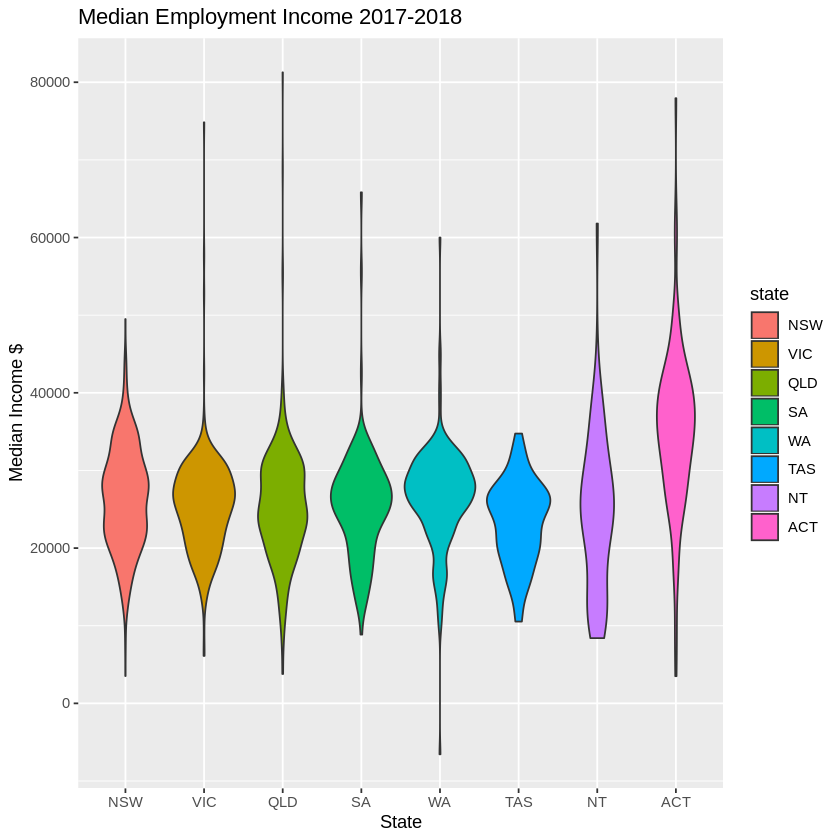

In [24]:
ggplot(dataset.sf, aes(x = state, y = dataset.sf[[variable.param]])) + 
  geom_violin(aes(fill = state)) +
  labs(title="Median Employment Income 2017-2018", x="State", y="Median Income $")

## Save Visualisation

In [25]:
ggsave("img/violin.png", plot = last_plot())

Saving 6.67 x 6.67 in image

Warning message:
“Removed 41 rows containing non-finite values (stat_ydensity).”
